In [1]:
#!/usr/local/bin/python
# -*- coding: utf-8 -*-
### export PYTHONIOENCODING=utf-8  # at cmd of linux
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import Constant
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import regularizers
from keras import backend as K
from tensorflow.keras.callbacks import *
from tensorflow.keras import utils
import tensorflow as tf

import torch

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import pickle
import time
import re
import nltk
import sys
import html
import xml.sax.saxutils as saxutils
from html.parser import HTMLParser
from io import StringIO
import random

from transformers import BertTokenizer, BertModel
from transformers import DistilBertModel,DistilBertTokenizer

from scipy.spatial.distance import cosine

from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
Stem=stemmer.stem

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemm=wordnet_lemmatizer.lemmatize

In [3]:
from gensim.models.fasttext import load_facebook_model

import fasttext.util
#fasttext.util.download_model('en', if_exists='ignore')  # English

In [4]:

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model_bert = DistilBertModel.from_pretrained('distilbert-base-uncased',
                                       output_hidden_states = True, # Whether the model returns all hidden-states.
                                       )  
'''
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased',
                                       output_hidden_states = True, # Whether the model returns all hidden-states.
                                       )
'''
print()

In [5]:
#print(len(cachedStopWords))
#print(len(cachedStopWords))
#print(type(cachedStopWords))

nltk_stopwords=set(cachedStopWords)

english_alghabet=['b','c','e','f','g','h','j','k','l','n','p','q','r','u','v','w','x','z']

numbers_remove=['one','two','three','four','five','six','seven','eight','nine','ten','tens','twenty',
                'fourty','fifty','sixty','seventy','eighty','ninety','hundred','hundreds','million','billion','trillion',
                'millions','thousand','thousands','second','third','forth','tenth','billions','trillions'] 

miscellaneous_remove=['absolutely', 'actually', 'adieu', 'ain', "ain't", 'aint', 'almost',
                       'awesome','awfully','amazing','interesting',
                       'alright','alrighty', 'amoungst', 'anybody', 'anymore', 'anyways', 'apart', 'apparently', 'anytime',
                       'appropriate',  'approximately', 'arent', 'behold', 'better', 'bravo','briefly','bad','best','brilliant',
                       'bye', 'cant', 'certainly', 'chrissakes', 'clearly', 'completely',
                       'congrat', 'congrats','congratulation', 'congratulations', 'consequently', 'cool', 'couldnt',
                       'darnit', 'de','dear', 'definitely','disappointing', 'didn', 'doesn', 'don', 'downwards',
                       'disgusting','dude','down','eg',"e.g.",'i.e.',
                       'encore','entirely', 'especially', 'et', 'etc', 'everybody', 'ex', 'exactly', 'excellent',
                       'fantastic','far', 'farewell','funny',
                       'felicitation', 'felicitations','finally', 'fully','furthermore', 'gadzooks', 
                       'good', 'goodby','goodness', 'gracious', 'great', 
                       'greetings', 'hallo', 'hardly', 'hasnt', 'haven', 'hello', 'here','hi', 'hither','higher','hopefully',
                       'here','there','including',
                       'howbeit', 'ie', 'immediately', 'inasmuch', 'inner', 'insofar', 'instead', 'inward', 'important',
                       'indeed','just', "it'd", "it'll", 'inside','kertyschoo', 'kg', 'km', 'lackaday', 
                       'largely', 'lately', 'later','lovely','large','big','small',
                       'lest', 'let', 'lets', 'likely', 'little', 'ltd', 'lower','magnificent', 'mainly', 'marvelous',
                       'myself','yourself','yourselves','himself','herself','hisself','ourselves','themsleves',
                       'maybe', 'meantime', 'merely', 'minus', 'near', 'nearly', 'necessary', 'never', 
                       'non', 'normally', 'obviously', 'ok', 'okay', 'ones', 'outside', 'over','other','others','only',
                       'overall', 'particular', 'particularly', 'please', 'plus', 'poorly', 'possible','up',
                       'possibly', 'potentially', 'predominantly', 'presumably', 'previously','primarily', 'probably',
                       'promising',
                       'promptly', 'readily', 'really', 'reasonably', 'recent', 'recently', 'ref',
                       'refs', 'regardless', 'related', 'relatively', 'respectively', 'resulting', 'right', 'sec', 
                       'secondly','self', 'selves', 'seriously', 'shall', 'shucks','somebody', 'somethan','sorry',
                       'somewhat', 'soon', 'late' , 'sorry', 'stupid', 'sub', 'substantially', 'successfully', 'sufficiently',
                       'useful',
                       'super', 'sure', "t's", 'th', 'thank', 'thanks', 'thanx', "that've", 'thats', 'there', "there'll",
                       "there've", 'thered', 'thereof', 'therere', 'theres', 'thereto', 'theyd', 'theyre', 'thorough',
                       'then','thankfully','too','today','yesterday','tomorrow','night',"morning",'afternoon','noon','tonight',
                       'evening','day','everyday', 'everynight','todays','nights','mornings','noons','afternoons','days',
                       'evenings','week','month','year',
                       'thoroughly', 'tnx', 'too','truly', 'twice', 'undoubtedly','unfortunately', 'unlike','unlikely',
                       'unto',  'usually', 'vs', 'welcome', 'well', 'went', 'werent', 'what', 'whatever', 'wheres', 'widely',
                       'wonderful', 'wont', 'wouldnt', 'wrong', 'worst','worse','www', 'yes', 'youd', 'youre', 'yummy', 
                       'zoinks','shit','literally','literal','pleasure','effective','fabulous','delighted',
                       'saturday','sunday','monday','tuesday','wednesday','thursday', 'friday','past','future','suitable',
                       'much','many','less','least','few','lots','lot','fewer','fewset','therefore','pm',
                       'afaik', 'br', 'idk','smh','qotd', 'ftw','bfn','yw', 'icymi','fomo','smdh', 'b4','imho',
                       'urdddd','fab' ,'delightful','absolute','pleasure','huge','latest','nowadays',
                       'january','february','april','june','july','august','september','october',
                       'november','december', 'autumn' ,'spring','winter','summer',
                       'mr','madam','sir','mrs','easy', 'difficult',
                       'weekend','south','north','west','east','asia','africa','europe','america','totally',
                       'come', 'comes', 'coming', 'came', 'seems', 'gives', 'gave', 'makes', 'made', 'keeps', 'kept', 
                       'calls', 'called', 'says', 'saying', 'said', 'goes', 'went', 'gone', 'got', 'saw', 'seen', 'shows',
                       'shown', 'took', 'taken', 'uses', 'moved', 'moves', 'puts',
                       'using','seem','give','make','keep','call','say','go','get','see','seems','seeming',
                       'seemed','show','take','made','used','move','become','became','becoming','becomes','put','use',
                       'find', 'finds', 'finding','aka',
                       'lol' , 'brb', 'lmk', 'ama', 'tbh', 'irl', "tl;dr", 'fml', 'bfn' ,' br', 'ht', "hth",'j/k', 'lmao' ] #cool

interjection_remove=['aaaahh', 'aaah', 'aaargh', 'aaay', 'aagh', 'aah',
                   'aargh', 'achoo', 'adios', 'ah', 'aha', 'ahem', 'ahh', 'ahhh',
                   'ahoy', 'alas', 'allo', 'amen', 'areet', 'argh', 'arrggh',
                   'arrividerci', 'asap', 'attaboy', 'avaunt', 'aw', 'aw', 'aww',
                   'awww', 'ay', 'ay', 'aye', 'ayeaugh', 'bada', 'badum', 'bah',
                   'bahaha', 'bam', 'bazinga', 'behold', 'bingce', 'bingo', 'blah',
                   'blech', 'bleh', 'blimey', 'bonjour', 'boo', 'booh', 'boohoo',
                   'booyah', 'bravo', 'brr', 'brrrr', 'btw', 'bwahaha', 'capeesh',
                   'capisce', 'cheerio', 'cheers', 'ciao', 'cor', 'cowabunga',
                   'crikey', 'cripes', 'da', 'dabba', 'dah', 'dammit', 'damn', 'dang',
                   'darn', 'de', 'dee', 'di', 'dizamn', 'doh', 'doo', 'drat', 'duh',
                   'dum', 'eeeek', 'eek', 'eep', 'egad', 'egads', 'eh', 'ehem', 'em',
                   'er', 'eureka', 'eww', 'ewww', 'eyh', 'fiddledeedee', 'fie',
                   'fore', 'foul', 'fuff', 'gah', 'gak', 'gee', 'geez', 'gesundheit',
                   'giddyap', 'golly', 'gosh', 'grr', 'grrrr', 'ha', 'hah', 'haha',
                   'hahaha', 'hallelujah', 'halloa', 'harrumph', 'harumph', 'haw',
                   'heck', 'heck', 'heeey', 'heh', 'hehe', 'hey', 'hhh', 'hic', 'hm',
                   'hmm', 'hmmm', 'hmmmm', 'hmmph', 'hmpf', 'ho', 'hola', 'hoo',
                   'hooray', 'howdy', 'hrmm', 'hrmph', 'hrmph', 'hrrmph', 'hu', 'huh',
                   'hullo', 'humph', 'hurrah', 'huzza', 'huzzah', 'ich', 'ick',
                   'ixnay', 'jeepers', 'jeez', 'kaboom', 'kapow', 'kerwham', 'la',
                   'lala', 'lo', 'lordy', 'meh', 'mhm', 'ml', 'mm', 'mmh', 'mmhm',
                   'mmm', 'muahaha', 'mwah', 'mwahaha', 'na','nay','nah', 'nanu', 'nooo', 'nope',
                   'nuh', 'oh', 'ohh', 'oho', 'oi', 'okeydoke', 'om', 'oof', 'ooh',
                   'oomph', 'oooh', 'ooooh', 'oops', 'ouch', 'ow', 'oww', 'oy',
                   'oyez', 'oyh', 'pew', 'pff', 'pffh', 'pfft', 'phew', 'phut',
                   'phweep', 'phwoar', 'phwoarr', 'poof', 'poogh', 'prethee',
                   'prithee', 'prosit', 'pssh', 'psst', 'queep', 'roger', 'salaam',
                   'salam', 'sheesh', 'shh', 'shhh', 'shitfire', 'shoo', 'shoop',
                   'shush', 'sigh', 'sssh', 'strewth', 'ta', 'tarnations', 'tchah',
                   'teehee', 'tish', 'touché', 'tsk', 'tss', 'tut', 'uggh', 'ugh',
                   'uh', 'uhh', 'uhm', 'um', 'umm', 'ummm', 'umph', 'unh', 'upadaisy',
                   'upsadaisy', 'ur', 'urgh', 'vay', 'vayf', 'viva', 'voila', 'waa',
                   'waaaaah', 'waah', 'wah', 'wahey', 'wassup', 'weee', 'welp',
                   'wham', 'whamo', 'whee', 'whew', 'whizz', 'whoa',
                   'whoo', 'whoopee','whoop', 'whoops', 'whoopsy', 'whoosh', 'woah', 'woo',
                   'woohoo', 'wotcha', 'wotcher', 'wow', 'wowsers', 'wowsers',
                   'wuzzup', 'wuzzup', 'wuzzup', 'ya', 'yabba', 'yada', 'yadda',
                   'yak', 'yarooh', 'yay', 'yea', 'yeah', 'yech', 'yee', 'yeeeeaah',
                   'yeehaw', 'yeow', 'yes', 'yessiree', 'yew', 'yikes', 'yippee',
                   'yo', 'yoo', 'yoohoo', 'yow', 'yowza', 'yuck', 'yuh', 'zing',
                   'zoiks', 'zomfg', 'zomg', 'zounds', 'zut']
             
import spacy
sp = spacy.load('en_core_web_sm')
spacy_stopwords = sp.Defaults.stop_words
type(spacy_stopwords)
#spacy_exclude=['using','name','seem','give','make','keep','call','say','go','get','see','seems','seeming',
#               'seemed','show','take','made','used','move','become','became','becoming','becomes','put','use']# serious

from stop_words import get_stop_words
stop_words = get_stop_words('en')
stop_words1 = get_stop_words('english')
#print(type(stop_words1))
#print()
#print(stop_words1)
lib_stopwords=set(stop_words1)

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
#print(type(ENGLISH_STOP_WORDS))
#print()
#print(set(ENGLISH_STOP_WORDS))
#sklearn_exclude=['find','get','found','go','see','seem','seems','give','seemed','take','keep','show','put','made'] # system  cry
sklearn_stopwords=set(ENGLISH_STOP_WORDS)

#spacy_stopwords.difference_update(set(spacy_exclude))
#sklearn_stopwords.difference_update(set(sklearn_stopwords))
#for removing "just" one item, use "remove"
temp_1=set([])
#temp_1.update(nltk_stopwords)
#temp_1.update(lib_stopwords)
#temp_1.update(sklearn_stopwords)
#temp_1.update(spacy_stopwords)
#temp_1.update(set(english_alghabet))
#temp_1.update(set(numbers_remove)) 
#temp_1.update(set(miscellaneous_remove))
#temp_1.update(set(interjection_remove))
#temp_1.update(['rt','be','will','was','were','is','am','are','have','has','had','do','does','done'])
#temp_1.update(['rt'])
cachedStopWords=temp_1
#len(cachedStopWords)

In [6]:
class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [7]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

#print(lemmatizer.lemmatize("I am loving it")) #I am loving it
#print(lemmatizer.lemmatize("loving")) #loving
#print(lemmatizer.lemmatize("loving", "v")) #love
#print(lemmatize_sentence("I am loving it")) #I be love it

In [8]:
def cleaning (text):
    
    #order of lines is important
    
    text=strip_tags(text)
    #text=html.unescape(text)   # stripping or converting html entities 
    #text=saxutils.unescape(text) 
    
    #convertings words that their lower and uper cases are different
    text=re.sub(" US | U\.S\. ", ' USA ', text) # before lower
    
    #converting
    text = re.sub("“|”", ''' " ''', text)  #before next lines
    text = re.sub("’|′|‘|`", " ' ", text)  #before next lines
    
    #removing tabs and lines
    text=re.sub('\t|\n', ' ', text)
    
    #converting lower_case
    text = text.lower() 
    
    #converting
#    text=re.sub('\$|£|€|¥|dollar|dollars|yen|yens|euros', ' money ', text)   # not euro 
    
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    
    #removing emoji
    text = emoji_pattern.sub(r' ', text) 

    #removing emojis and non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+|,Ä¶',' ', text)  

    #removeing http and https (URL)
    text = re.sub(r'(http://|https://)\S+', '', text)
    
    #removing www (URL)
    text=re.sub(r'www\.\S+', '', text)
    
    #removing targets
    text=re.sub('( |^)@\S+', '', text) 

    '''
    #removing common expressions
    text=re.sub("looking forward to|look forward to|make sure|kidding me|\
                |in my opinion|by the way,|as soon as possible|shaking my head|i don't know|I do not know|\
                |in real life|quote of the day|as far as i know|shake my head|\
                |to be honest|in other words|let me know|just kidding|hope that helps|hat tip|\
                |just like that|happy birthday|never mind|well-done|\
                |in my humble opinion|happy new year|you're welcome|you are welcome| \
                |it doesn't matter|it does not matter|i think|i wonder|do you think", ' ', text)  
    '''
    
    #convertings
    text=re.sub("can't", 'cannot', text) # before other n't 
    text=re.sub("can not ", 'cannot ', text)  
    text=re.sub("'ve",' have', text)
    text=re.sub("n't",' not', text)
    text=re.sub("'ll",' will', text)
#    text=re.sub("'d",' would', text)
    text=re.sub("'re",' are', text)
    text=re.sub("i'm",'i am', text)
    text=re.sub("&",' and ', text)
    text=re.sub(" w/ ",' with ', text)
    text=re.sub(" w/i | w/in ",' within ', text)
    text=re.sub(" w/o ",' without ', text)
    text=re.sub(" c/o ",' care of ', text)
    text=re.sub(" h/t ",' hat tip ', text)
    text=re.sub(" b/c ",' because ', text)
#    text=re.sub("=",' equals to ', text)
    text=re.sub("=",' = ', text)
#    text=re.sub("\+",' plus ', text)
    text=re.sub("\+",' + ', text)
    text=re.sub("united states",'usa', text)
    text=re.sub("united kingdom",'uk', text)
    text=re.sub(" the us ",' usa ', text)
    text=re.sub("start-up|start_up",'startup', text)
    text=re.sub("u\.s\.a", 'usa', text)  #try text=re.sub("u.s.a", 'usa', text) with text=substantially 
    #text=re.sub("aka", 'also known as', text)     
    text=re.sub("'"," ' ", text)     
    
    text= re.sub("(\?)+", '? ',text)     
    text= re.sub("(!)+", '! ',text)     
    text= re.sub("(\.\.)+", ' ',text)   

#    text = "".join(lemmatize_sentence(text))
    
    #removing some special charachter  
#    text= re.sub("[\"\+\-\|\*\?\(\)\/\\\^\[\]``<>\.{}`′’‘'_;•«»,@:~!\=%&]+", ' ',text) 
#    text= re.sub("[\"\“\”\+\-\|\*\?\(\)\/\\\^\[\]\.{}_`′’‘';•«,@:~!\=%&]+", ' ',text) 
    
    #removing hashtag
#    text=re.sub('#', ' ', text) 
    
    #removing numbers not attached to alphabets
    '''
    text=re.sub("(^)(\d+)?(\.)?(\d+)? ",' ',text)   #removing numer at the beginning
    text=re.sub("(\s)[0-9]?(\.)?(\d+) ",' ',text) #py6 and py9
    text= re.sub(" (\.)(\d+) ", ' ',text)
    text= re.sub(" (\d+) (\d+) (\d+) (\d+) (\d+) ", ' ',text)
    text= re.sub(" (\d+) (\d+) (\d+) (\d+) ", ' ',text)
    text= re.sub(" (\d+) (\d+) (\d+) ", ' ',text)
    text= re.sub(" (\d+) (\d+) ", ' ',text)
    text= re.sub(" (\d+) ", ' ',text)
    text= re.sub(" (\d+)$", ' ',text)
    '''
    #text=re.sub("\S+(\d+) ",' ',text) # alphabet+digit (attached)
    #text=re.sub(" (\d+)\S+",' ',text) # digit+alphabet (attached)
    #text=re.sub(" \S+(\d+)\S+ ",' ',text) # alphabet+digit+alphabet (attached)
    #text=re.sub("(\d+)",' ',text)  #removing any number anywhere but keeps \. for decimal numbers

    #removing space
    text=re.sub('\s+',' ',text)    
    
    text=re.sub('(^)rt ','',text)    # if we do not want to remove stopwords

#    text= nltk.word_tokenize(text) # necessary for removing stopwords
    #text= text.split() #sometimes

    #removing_stopwords 
    #text_without_sw = [word.lower() for word in text if word.lower() not in stopwords.words()] #very slow
#    text = [word for word in text if word not in cachedStopWords]

    #lemmatization
    #text= [ lemm(word, pos="v") for word in text]
    #text= [ lemm(word, pos="n") for word in text]
    #text= [ lemm(word, pos="a") for word in text]
    
    #stemming 
    #text = [Stem(word) for word in text]
    
#    text=' '.join(text)
#    text=re.sub("''",'''"''', text)    #since nltk.tokenize converts second " to ''"
#    text=re.sub("``",'''"''', text)   # since nltk.tokenize converts first " to " ``
    
    return text

In [9]:
def sep(text):
    text=text.translate(str.maketrans({'&': ' & ', '#': ' # ' , '\"':' " ', '\+': ' + ', '\-': ' - ',
                                       '\|': ' | ', '\*': ' * ', '\?': ' ? ', '\(':' ( ', '\)':' ) ',
                                       '\/': ' / ', '\\':' \ ', '\^':' ^ ', '\[':' [ ', '\]':' ] ', 
                                       '<': ' < ', '>':' > ', '\.':' . ' , '{':' { ', '}': ' } ', '`': ' ` ',
                                       '′':' ′ ', '’':' ’ ', '‘':' ‘ ', "'":" ' ", ';': ' ; ','•':' • ', '«':' « ',
                                       '»': ' » ', ',':' , ', '@':' @ ', ':':' : ', '\=': ' =', '!': ' ! ', '~':' ~ ', 
                                       '%': ' % ' })) #except _ 

In [10]:
'''
import psycopg2
con = psycopg2.connect(database="postgres", user="postgres", password="Jafarsql", host="localhost", port="5432")
print("Database opened successfully")

cur = con.cursor()
##cur.execute("SELECT user_id, tweet from mng_2019_100K limit 100000 ")
cur.execute("SELECT user_id, tweet from mng_2019_1000k ")
rows_mng = cur.fetchall()
con.close()

print(len(rows_mng))
'''
pass

In [14]:
#df_mng = pd.read_csv('/archives1/Datasets/TweetsWorld/mng_tweets_world.csv', delimiter='\t', na_values=".",error_bad_lines=False)#,warn_bad_lines=False)
df_mng = pd.read_csv('mng_tweets_world.csv', delimiter='\t', na_values=".",error_bad_lines=False)#,warn_bad_lines=False)
print(df_mng.shape)
print(df_mng.columns)
#print(df_mng.head()) # Preview the first 5 lines of the loaded data 

rows_mng=list(df_mng[['user_id', 'tweet','tweet_created_at']].itertuples(index=False, name=None)) #rows_mng0
#rows_mng= list(zip(df_mng.user_id, df_mng.tweet))
#rows_mng=df_mng[['user_id','tweet']].apply(tuple, axis=1) 
del df_mng

print("Number of tweets in mng:",len(rows_mng))  #rows_mng0
print('Memory size of mng:',sys.getsizeof(rows_mng)) #rows_mng0

(46502302, 4)
Index(['user_id', 'tweet', 'tweet_created_at', 'location_profile'], dtype='object')
Number of tweets in mng: 46502302
Memory size of mng: 402267520


In [15]:
'''
import psycopg2
con = psycopg2.connect(database="postgres", user="postgres", password="Jafarsql", host="localhost", port="5432")
print("Database opened successfully")

cur = con.cursor()
cur.execute("SELECT user_id, tweet from mng_2019_1000k ")
rows_mng = cur.fetchall()
con.close()

print(len(rows_mng))
'''
pass

In [16]:
'''
df_mng = pd.read_csv('mng_tweets_world.csv', delimiter='\t', na_values=".",error_bad_lines=False,warn_bad_lines=False)
#df_mng = pd.read_csv('/archives1/Datasets/TweetsWorld/mng_tweets_world.csv', delimiter='\t', na_values=".",error_bad_lines=False,warn_bad_lines=False)
print(df_mng.shape)
print(df_mng.columns)
#print(df_mng.head()) # Preview the first 5 lines of the loaded data 

rows_mng=list(df_mng[['user_id', 'tweet','tweet_created_at']].itertuples(index=False, name=None)) #rows_mng0
#rows_mng= list(zip(df_mng.user_id, df_mng.tweet))
#rows_mng=df_mng[['user_id','tweet']].apply(tuple, axis=1) 
del df_mng
print(len(rows_mng)) #rows_mng0
print('memry size of mng:', sys.getsizeof(rows_mng)) #rows_mng0
'''
pass

In [17]:
'''
import psycopg2
con = psycopg2.connect(database="postgres", user="postgres", password="Jafarsql", host="localhost", port="5432")
print("Database opened successfully")

cur = con.cursor()
cur.execute("SELECT user_id, tweet from public_2019_1000k")
rows_public = cur.fetchall()
con.close()

print(len(rows_public))
'''
pass

In [18]:
'''
df_public = pd.read_csv('public_tweets_world.csv', delimiter='\t', na_values=".",error_bad_lines=False)#,warn_bad_lines=False)
#df_public = pd.read_csv('/archives1/Datasets/TweetsWorld/public_tweets_world.csv', delimiter='\t', na_values=".",error_bad_lines=False)#,warn_bad_lines=False)

print(df_public.shape)
print(df_public.columns)
#print(df_public.head()) # Preview the first 5 lines of the loaded data 

rows_public00=list(df_public[['user_id', 'tweet', 'tweet_created_at']].itertuples(index=False, name=None))
#rows_public= list(zip(df_public.user_id, df_public.tweet))
#rows_public=df_public[['user_id','tweet']].apply(tuple, axis=1) 
del df_public
print(len(rows_public00))
print('memory size of public:', sys.getsizeof(rows_public00))
'''
pass

In [19]:
'''
rows_public0=[]
for i in rows_public00:
    if ('2021' not in i[2] ) and ('2020-12' not in i[2]) and ('2020-11' not in i[2]) and ('2020-10' not in i[2]):
        rows_public0.append(i)

        
print(len(rows_public0))
del rows_public00


#with open("rand_inds3.txt", "rb") as fp:   
#    rand_inds3=pickle.load(fp)
    
    
rand_inds0e=np.sort(random.sample(range(0, len(rows_public0)), 1000000))  

rows_public=[]
for i in rand_inds0e:
    rows_public.append(rows_public0[i])
print(len(rows_public))

del rows_public0


with open("rand_inds0e.txt", "wb") as fp:   
    pickle.dump(rand_inds0e, fp , protocol=4)

print('memory size of public:',sys.getsizeof(rows_public))
'''
pass

In [20]:
year='2018'

In [21]:
with open("mng_filtering.txt", "rb") as fp:   
    mng_filter = pickle.load(fp)

In [22]:
with open("./years/"+year+"_seed_mng_pos_1.txt", "rb") as fp:   
    id_mng_rel = pickle.load(fp)

In [23]:
with open("./years/"+year+"_seed_mng_neg_1.txt", "rb") as fp:   
    id_mng_irrel = pickle.load(fp)

In [24]:
#with open("./years/"+year+"_tweets_mng_scores_1.txt", "rb") as fp:   
#    dic_mng_tweets_scores = pickle.load(fp)

In [25]:
len(id_mng_rel), len(id_mng_irrel), len(id_mng_rel)+len(id_mng_irrel)

(1137835, 808207, 1946042)

In [461]:
with open("./years/"+year+"_mng_year_ind.txt", "rb") as fp:   
    mng_year_ind=pickle.load(fp)

In [462]:
len(mng_year_ind)

2000000

In [463]:
t0 = time.time()

mng_year_ind_all=set()
#mng_tweets_rows=[]

for k, i in enumerate(rows_mng):
    #mng_tweets_rows.append(cleaning(i[1]))
    if year in i[2]:
        if str(i[0]) not in mng_filter:
            mng_year_ind_all.add(k)

print( time.time() - t0)

71.43217325210571


In [464]:
len(mng_year_ind_all)

3375928

In [465]:
with open("./years/"+year+"_mng_year_ind.txt", "rb") as fp:   
    mng_year_ind=pickle.load(fp)

len(mng_year_ind)

2000000

In [466]:
'''
t0 = time.time()

#mng_users_rows=[]
mng_tweets_rows=[]
for i in rows_mng:
    #mng_users_rows.append(i[0])
    mng_tweets_rows.append(cleaning(i[1]))
    
print( time.time() - t0)

#mng_users_rows_np=np.array(mng_users_rows)  
#mng_users=np.unique(mng_users_rows_np)
#print(len(mng_users))
'''
pass

In [467]:
#with open("./years/mng_cleaning_classification.txt", "wb") as fp:  
#    pickle.dump(mng_tweets_rows, fp , protocol=4)

In [468]:
with open("./years/mng_cleaning_classification.txt", "rb") as fp:  
    mng_tweets_rows=pickle.load(fp)

In [469]:
'''
t0 = time.time()

mng_users_rows=[]
mng_tweets_rows=[]
for i in rows_mng:
    mng_users_rows.append(i[0])
    mng_tweets_rows.append(cleaning(i[1]))

print( time.time() - t0)

mng_users_rows_np=np.array(mng_users_rows)  
mng_users=np.unique(mng_users_rows_np)
print(len(mng_users))
'''
pass

In [470]:
'''
t0 = time.time()
public_users_rows=[]
public_tweets_rows=[]

for i in rows_public:
    public_users_rows.append(i[0])
    public_tweets_rows.append(cleaning(i[1]))

print( time.time() - t0)

public_users_rows_np=np.array(public_users_rows)  
public_users=np.unique(public_users_rows_np)
print(len(public_users))
'''
pass

In [471]:
def embedder (tweets):
    # padding after {SEP}
    embedding_dim=768
    t0 = time.time()
    max_len_tokens=20
    num_tweets=np.shape(tweets)[0]
    tweets_embedded= np.zeros([num_tweets,max_len_tokens,embedding_dim],dtype="float32")
    #mng_full_embedding_word=[]
#    mng_full_tokenized=[]
    
    for i, text in enumerate(tweets):

        marked_text = "[CLS] " + text + " [SEP]"
        tokenized_text = tokenizer.tokenize(marked_text)
#        print('a1',tokenized_text)
        
        # truncate if size of tekens is more than max_len_tokens
        if len(tokenized_text)>max_len_tokens+2:
#            print('a2',max_len_tokens+2)
            tokenized_text= tokenized_text[0:max_len_tokens+2]
#            print('a3',tokenized_text)
            tokenized_text[max_len_tokens+2-1]="[SEP]"
#            print('a4',tokenized_text)

        indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
#        print('a5',indexed_tokens)
        indexed_tokens = indexed_tokens + [0] * (max_len_tokens+2 - len(indexed_tokens))
#        print('a6',indexed_tokens)

        segments_ids = [1] * len(tokenized_text)
        temp=len(tokenized_text)
        segments_ids= segments_ids + [0] * (max_len_tokens+2 - len(segments_ids)) 
#        print('a7',segments_ids) 

        tokens_tensor = torch.tensor([indexed_tokens])
        segments_tensors = torch.tensor([segments_ids])
        with torch.no_grad():
            outputs = model_bert(tokens_tensor, segments_tensors)
            out = outputs[0]

        token_embeddings = torch.squeeze(out, dim=0)  
#        print('a8',token_embeddings)
        token_embeddings=np.delete(token_embeddings, (0,temp-1), axis = 0)

        tweets_embedded[i]=token_embeddings
#        mng_full_tokenized.append(tokenized_text)

#    print(np.shape(tweets_embedded))
#    print( time.time() - t0)
    return tweets_embedded    

In [472]:
def embedder2 (tweets):
    #padding before {SEP}
    embedding_dim=768
    t0 = time.time()
    max_len_tokens=20
    num_tweets=np.shape(tweets)[0]
    tweets_embedded= np.zeros([num_tweets,max_len_tokens,embedding_dim],dtype="float32")
    #mng_full_embedding_word=[]
#    mng_full_tokenized=[]
    
    for i, text in enumerate(tweets):

        marked_text = '[CLS]'+ text 
        tokenized_text = tokenizer.tokenize(marked_text)
#        print('a1',tokenized_text)
        temp=len(tokenized_text)
#        print(temp)
        # truncate if size of tekens is more than max_len_tokens
        if temp>=max_len_tokens+2:
#            print('a2',max_len_tokens+2)
            tokenized_text= tokenized_text[0:max_len_tokens+2]
#            print('a3',tokenized_text)
            tokenized_text[max_len_tokens+2-1]="[SEP]"
#            print('a4',tokenized_text)
        else:
#            print(type(tokenized_text))
            tokenized_text = tokenized_text + ['[PAD]'] * (max_len_tokens+1 - temp)+ ['[SEP]']
#            print('a44',tokenized_text)

#            tf.keras.preprocessing.sequence.pad_sequences(
#                sequences, maxlen=10, dtype='int32', padding='post',
#                truncating='post', value=0.0)

        indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
#        print('a5',indexed_tokens)
#        indexed_tokens = indexed_tokens + [0] * (max_len_tokens+2 - len(indexed_tokens))
#        print('a6',indexed_tokens)

#        segments_ids = [1] * len(tokenized_text)
        segments_ids= [1]* min(temp,max_len_tokens+1) + [0] * (max_len_tokens+1 - temp)  + [1]
#        print('a7',segments_ids) 

        tokens_tensor = torch.tensor([indexed_tokens])
        segments_tensors = torch.tensor([segments_ids])
        with torch.no_grad():
            outputs = model_bert(tokens_tensor, segments_tensors)
            out = outputs[0]

        token_embeddings = torch.squeeze(out, dim=0)  
#        print('a8',token_embeddings)
        token_embeddings=np.delete(token_embeddings, (0,-1), axis = 0)

        tweets_embedded[i]=token_embeddings
#        mng_full_tokenized.append(tokenized_text)

#    print(np.shape(tweets_embedded))
#    print( time.time() - t0)
    return tweets_embedded    

In [473]:
def embedder0 (tweets):
    #padding before {SEP} forcing zero
    embedding_dim=768
    t0 = time.time()
    max_len_tokens=30
    num_tweets=np.shape(tweets)[0]
    tweets_embedded= np.zeros([num_tweets,max_len_tokens,embedding_dim],dtype="float32")
#    print('a11',np.shape(vector_temp))

    #mng_full_embedding_word=[]
#    mng_full_tokenized=[]
    
    for i, text in enumerate(tweets):
        
        
                
        marked_text = '[CLS]'+ text + '[SEP]'
        tokenized_text = tokenizer.tokenize(marked_text)
        segments_ids = [1] * len(tokenized_text)
#        print('a1',tokenized_text)
        temp=len(tokenized_text)-2
        indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
        tokens_tensor = torch.tensor([indexed_tokens])
        segments_tensors = torch.tensor([segments_ids])
        with torch.no_grad():
            outputs = model_bert(tokens_tensor, segments_tensors)
            out = outputs[0]
        token_embeddings = torch.squeeze(out, dim=0)  
#        print('a8',token_embeddings)
        token_embeddings=np.delete(token_embeddings, (0,-1), axis = 0)
#        print('a88',len(token_embeddings))
        if len(token_embeddings)>=max_len_tokens:
            vector_temp= token_embeddings[0:max_len_tokens]
#            print('a9',vector_temp)
        else:
            vector_temp = np.zeros([max_len_tokens,embedding_dim],dtype="float32")
            vector_temp[0:temp] = token_embeddings
#            print('a99',vector_temp)
        tweets_embedded[i]=vector_temp
#        mng_full_tokenized.append(tokenized_text)

#    print(np.shape(tweets_embedded))
#    print( time.time() - t0)
    return tweets_embedded    

In [474]:
#aa=embedder0(['That is very good and joy '])
#aa.shape

In [475]:
#rand_inds1e=random.sample(range(0, 1000000), 300000) #200000

In [476]:
#with open("rand_inds1e.txt", "wb") as fp:   
#    pickle.dump(rand_inds1e, fp , protocol=4)

In [477]:
'''
temp_set=set()
seed_public0=[]
for i in rand_inds1e:
    temp=public_tweets_rows[i]
    if temp !='' and temp !=' ':
        if temp not in temp_set:
            seed_public0.append(public_tweets_rows[i])
            temp_set.add(temp) # in order that we do not have repetative tweets
'''
pass

In [478]:
#len(seed_public0)

In [479]:
#seed_public=seed_public0[0:200000]
#len(seed_public)

In [480]:
#time.sleep(5*60)

In [481]:
#with open("./seed_tweets_mng10m.txt", "rb") as fp:   
#    seed_tweets_mng = pickle.load(fp)

In [482]:
#seed_mng=[]
#for tweet in seed_tweets_mng:
#    seed_mng.append(cleaning(tweet))    

In [483]:
#seed_mng=seed_mng[0:40000]

In [484]:
# be careful: it has been changed 
seed_negative_all=[]
for index in id_mng_irrel:
    #print(index)
    #print(mng_tweets_rows[index])
    #print(rows_mng[index])
    seed_negative_all.append(mng_tweets_rows[index])    

In [485]:
len(seed_negative_all)

808207

In [486]:
len(id_mng_irrel)

808207

In [487]:
import math

In [488]:
middle=math.floor(len(seed_negative_all)/2)
num=50000

In [489]:

rand_inds_n=np.sort(random.sample(range(0, len(seed_negative_all)), num ))

seed_negative=[]
for i in rand_inds_n:
    seed_negative.append(seed_negative_all[i])
print(len(seed_negative) )  

pass

50000


In [490]:
id_neg=[]
for i in rand_inds_n:
    id_neg.append(id_mng_irrel[i])

len(id_neg)

50000

In [491]:
#seed_negative=seed_negative_all[0:len(seed_negative_all)]
#seed_negative=seed_negative_all[0:num]

In [492]:
#seed_negative=seed_negative_all[len(seed_negative_all)-num:len(seed_negative_all)]

In [493]:
len(seed_negative)

50000

In [494]:
seed_mng_all=[]
for index in id_mng_rel:
    #print(index)
    #print(mng_tweets_rows[index])
    #print(rows_mng[index]) 
    seed_mng_all.append(mng_tweets_rows[index])    

In [495]:
len(seed_mng_all)

1137835

In [496]:
seed_mng=seed_mng_all[0:len(seed_negative)]

In [497]:
#seed_mng=seed_mng_all[len(seed_mng_all)-len(seed_negative):len(seed_mng_all)]

In [498]:
'''
rand_inds_p=np.sort(random.sample(range(0, len(seed_mng_all)), len(seed_negative)))  

seed_mng=[]
for i in rand_inds_p:
    seed_mng.append(seed_mng_all[i])
print(len(seed_mng))
'''
pass

In [499]:
'''
id_pos=[]
for i in rand_inds_p:
    id_pos.append(id_mng_rel[i])

len(id_pos)
'''
pass

In [500]:
len(seed_mng)

50000

In [ ]:
time.sleep(5*60)

In [501]:
y_data=[1]*len(seed_mng)+[0]*len(seed_negative)
len(y_data)

100000

In [502]:
y_data[0:10], y_data[-10:-1]

([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
'''
df_mng = pd.DataFrame({'tweet':seed_mng})
df_mng['len'] = df_mng['tweet'].apply(lambda x: len(str(x).split(' ')))
df_mng

print('mng')
print("mean length of tweets: " + str(df_mng['len'].mean()))
print("max length of tweets:  " + str(df_mng['len'].max()))
print("std length of tweets:  " + str(df_mng['len'].std()))
'''
pass

In [ ]:
'''
df_public = pd.DataFrame({'tweet':seed_public})
df_public['len'] = df_public['tweet'].apply(lambda x: len(str(x).split(' ')))
#df_public

print('public')
print("mean length of tweets: " + str(df_public['len'].mean()))
print("max length of tweets:  " + str(df_public['len'].max()))
print("std length of tweets:  " + str(df_public['len'].std()))
'''
pass

In [503]:
x_data=seed_mng+seed_negative
len(x_data)

100000

In [504]:
indices=np.arange(len(x_data))

In [505]:
indices[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [506]:
train_texts, test_texts, y_train, y_test,idx1,idx2 = train_test_split(x_data, y_data,indices ,test_size=0.2,shuffle=True, stratify= y_data)
print("train set size " + str(len(train_texts)))
print("test set size " + str(len(test_texts)))

train set size 80000
test set size 20000


In [507]:
y_train[0:10],y_test[0:10],idx1[0:10]

([1, 1, 1, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
 array([42594,  8746, 16597, 60984, 47711, 63747, 20171,  7926, 78875,
        58980]))

In [ ]:
#data_test=embedder0(mng_all[0:1000])

In [ ]:
#train_texts=seed_mng+seed_public
#len(train_texts)

In [ ]:
#for tweet in mng_tweets_rows:
#    texts.append(tweet)

In [58]:
time.sleep(5*60)

In [508]:
import nltk

In [509]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
#tknzr.tokenize(text)

In [512]:

t0=time.time()
train_texts_tokens=[]
for text in train_texts:
#    tokens=text.split()
    #tokens=nltk.word_tokenize(text)
    tokens=tknzr.tokenize(text)
    train_texts_tokens.append(tokens)
    
print(len(train_texts_tokens))
time.time()-t0

80000


10.64244031906128

In [62]:
time.sleep(5*60)

In [514]:
ft = fasttext.load_model('cc.en.300.bin')
print(ft.get_dimension())

300


In [515]:
#fasttext.util.reduce_model(ft, 100)
#ft.get_dimension()

In [ ]:
time.sleep(5*60)

In [516]:
t0=time.time()
embedding_dim=300
max_tokens=50
#X_train_test=[]
x_train=np.zeros([len(train_texts_tokens),max_tokens,embedding_dim],dtype='float32')

for kk,tokens in enumerate(train_texts_tokens):
    if tokens !="" and tokens!=' ' and  tokens!=[]:   
        a1=[]
        for token in tokens:
            a1.append( ft.get_word_vector(token) )
                    
        temp=np.zeros([max_tokens,embedding_dim])
        if len(tokens)>max_tokens:
            temp=a1[0:max_tokens]
        elif len(tokens)==max_tokens:
            temp=a1
        else: # if len(tokens)<max_tokens:
            temp[0:len(tokens)]=a1
#        X_train_test.append(temp) 
        x_train[kk]=temp

    else:
        temp=np.zeros([max_tokens,embedding_dim])
#        X_train_test.append(temp)
        x_train[kk]=temp
        
time.time()-t0
        

18.880743741989136

In [ ]:
time.sleep(5*60)

In [517]:
print(type(x_train))
len(x_train)

<class 'numpy.ndarray'>


80000

In [518]:
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

In [ ]:
#x_train1, x_test1, y_train, y_test = train_test_split(data, y_data, test_size=0.2, shuffle=True, stratify= y_data)   

In [ ]:
time.sleep(5*60)

In [519]:
sequence_length=50
num_filters=100
embedding_dim=300   #768 for bert
dropout_rate=0.2

In [520]:
inputs = Input(shape=(sequence_length,embedding_dim,), dtype='float32')
#inputs = Input(shape=(sequence_length,), dtype='float32')

#embedded_inputs = embedding_layer(inputs)
#embedding_layer = Embedding(input_dim=20000, output_dim=embedding_dim, input_length=sequence_length, weights=[inputs])(inputs)

#inputs_reshaped = Reshape((sequence_length, embedding_dim, 1))(embedded_inputs)
inputs_reshaped = Reshape((sequence_length, embedding_dim, 1))(inputs)

conv_1 = Conv2D(num_filters, kernel_size=(1, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(inputs_reshaped)
#conv_1 = LeakyReLU(alpha=0.2)(conv_1) #without activation at Conv2D
conv_1 = BatchNormalization()(conv_1)

conv_2 = Conv2D(num_filters, kernel_size=(2, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(inputs_reshaped)
#conv_2 = LeakyReLU(alpha=0.2)(conv_2)
conv_2 = BatchNormalization()(conv_2)

conv_3 = Conv2D(num_filters, kernel_size=(3, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(inputs_reshaped)
#conv_3 = LeakyReLU(alpha=0.2)(conv_3)
conv_3 = BatchNormalization()(conv_3)

conv_4 = Conv2D(num_filters, kernel_size=(4, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(inputs_reshaped)
#conv_4 = LeakyReLU(alpha=0.2)(conv_4)
conv_4 = BatchNormalization()(conv_4)

conv_5 = Conv2D(num_filters, kernel_size=(5, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(inputs_reshaped)
#conv_5 = LeakyReLU(alpha=0.2)(conv_5)
conv_5 = BatchNormalization()(conv_5)

conv_6 = Conv2D(num_filters, kernel_size=(6, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(inputs_reshaped)
#conv_6 = LeakyReLU(alpha=0.2)(conv_6)
conv_6 = BatchNormalization()(conv_6)

conv_7 = Conv2D(num_filters, kernel_size=(7, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(inputs_reshaped)
#conv_7 = LeakyReLU(alpha=0.2)(conv_7)
conv_7 = BatchNormalization()(conv_7)

#conv_8 = Conv2D(num_filters, kernel_size=(8, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(inputs_reshaped)
#conv_8 = LeakyReLU(alpha=0.2)(conv_8)
#conv_8 = BatchNormalization()(conv_8)

maxpool_1 = MaxPool2D(pool_size=(sequence_length - 1 + 1, 1), strides=(1,1))(conv_1)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - 2 + 1, 1), strides=(1,1))(conv_2)
maxpool_3 = MaxPool2D(pool_size=(sequence_length - 3 + 1, 1), strides=(1,1))(conv_3)
maxpool_4 = MaxPool2D(pool_size=(sequence_length - 4 + 1, 1), strides=(1,1))(conv_4)
maxpool_5 = MaxPool2D(pool_size=(sequence_length - 5 + 1, 1), strides=(1,1))(conv_5)
maxpool_6 = MaxPool2D(pool_size=(sequence_length - 6 + 1, 1), strides=(1,1))(conv_6)
maxpool_7 = MaxPool2D(pool_size=(sequence_length - 7 + 1, 1), strides=(1,1))(conv_7)
#maxpool_8 = MaxPool2D(pool_size=(sequence_length - 8 + 1, 1), strides=(1,1))(conv_8)

#concatenated_m1 = Concatenate(axis=3)([maxpool_1, maxpool_2, maxpool_3, maxpool_4, maxpool_5])
concatenated_m1 = Concatenate(axis=3)([ maxpool_1, maxpool_2, maxpool_3, maxpool_4, maxpool_5, maxpool_6, maxpool_7 ])

X = Flatten()(concatenated_m1)

X = Dense(units=512, activation='linear')(X) 
X = Dropout(dropout_rate)(X)

X = Dense(units=256, activation='linear')(X) 
X = Dropout(dropout_rate)(X)

X = Dense(units=128, activation='linear')(X) 
X = Dropout(dropout_rate)(X)

X = Dense(units=64, activation='linear')(X) 
X = Dropout(dropout_rate)(X)

X = Dense(units=32, activation='linear')(X) 
X = Dropout(dropout_rate)(X)

X = Dense(units=16, activation='linear')(X)
X = Dropout(dropout_rate)(X)

X = Dense(units=8, activation='linear')(X)
X = Dropout(dropout_rate)(X)

#outputs = Dense(units=5, activation='softmax')(X) 
outputs = Dense(units=1, activation='sigmoid')(X) 

classifier = keras.Model(inputs, outputs)
classifier.summary()
#classifier.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3) , loss= 'categorical_crossentropy', metrics=['accuracy'])
classifier.compile(optimizer=keras.optimizers.Adamax() , loss= 'binary_crossentropy', metrics=['accuracy'])

#optim= adamax, adam
#loss:categorical_crossentropy, KLDivergence, 

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 50, 300)]    0                                            
__________________________________________________________________________________________________
reshape_7 (Reshape)             (None, 50, 300, 1)   0           input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 50, 1, 100)   30100       reshape_7[0][0]                  
__________________________________________________________________________________________________
conv2d_50 (Conv2D)              (None, 49, 1, 100)   60100       reshape_7[0][0]                  
____________________________________________________________________________________________

In [521]:
'''
# not good results ##type 2( small kernels like images)
#sequence_length=16 # or 24 or 32 or 64 
##encoder
print(sequence_length,embedding_dim)
inputs = Input(shape=(sequence_length,embedding_dim,), dtype='float32')

x = Reshape((sequence_length, embedding_dim, 1))(inputs)
print(x.shape)
x = Conv2D(8, (4,4), activation='relu', padding='same')(x)
print(x.shape)
x = MaxPooling2D((2, 3), padding='same')(x)
print(x.shape)
x = Conv2D(8, (4,4), activation='relu', padding='same')(x)
print(x.shape)
x = MaxPooling2D((2, 3), padding='same')(x)
print(x.shape)
x = Conv2D(8, (2, 2), activation='relu', padding='same')(x)
print(x.shape)
x = MaxPooling2D((2, 3), padding='same')(x) 
print(x.shape)

#print(x.shape)

x = Flatten()(x)
print(np.shape(x))
#x = Dense(1764, activation="relu")(x)

#x = Dense(units=8, activation='linear')(x)
#x = Dropout(dropout_rate)(x)

outputs = Dense(units=5, activation='softmax')(x) 

classifier = keras.Model(inputs, outputs)
#optim = keras.optimizers.Adam(learning_rate=0.0001)
#classifier.compile(optimizer=optim)
classifier.compile(optimizer=keras.optimizers.Adam() , loss= 'categorical_crossentropy', metrics=['accuracy'])
classifier.summary()
'''
pass

In [522]:
y_train[0:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 1., 0., 1., 1., 0., 0.], dtype=float32)>

In [526]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-6, patience=5, verbose=1, mode='auto', restore_best_weights=True)

#history= classifier.fit(x_train,x_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,batch_size=32,epochs=1000)
print(np.shape(x_train))

history=classifier.fit(x_train,y_train,
                        epochs=10,
                        #callbacks=[monitor],
                        batch_size=512, # or 64
                        shuffle= True,
                        verbose=1,
                        validation_split=0.125) #0.25

#history = classifier.fit(x_train, y_train, epochs=8, batch_size=512, verbose=1, validation_split=0.25, shuffle=True)

(80000, 50, 300)
Epoch 1/10
137/137 [==============================] - 168s 1s/step - loss: 0.3042 - accuracy: 0.9552 - val_loss: 0.4848 - val_accuracy: 0.9432
Epoch 2/10
137/137 [==============================] - 170s 1s/step - loss: 0.2558 - accuracy: 0.9654 - val_loss: 0.2846 - val_accuracy: 0.9735
Epoch 3/10
137/137 [==============================] - 153s 1s/step - loss: 0.2436 - accuracy: 0.9692 - val_loss: 0.1986 - val_accuracy: 0.9735
Epoch 4/10
137/137 [==============================] - 157s 1s/step - loss: 0.2096 - accuracy: 0.9742 - val_loss: 0.2042 - val_accuracy: 0.9774
Epoch 5/10
137/137 [==============================] - 162s 1s/step - loss: 0.2123 - accuracy: 0.9763 - val_loss: 0.1884 - val_accuracy: 0.9798
Epoch 6/10
137/137 [==============================] - 162s 1s/step - loss: 0.2107 - accuracy: 0.9770 - val_loss: 0.2225 - val_accuracy: 0.9737
Epoch 7/10
137/137 [==============================] - 162s 1s/step - loss: 0.2008 - accuracy: 0.9785 - val_loss: 0.2868 - val

In [ ]:
time.sleep(5*60)

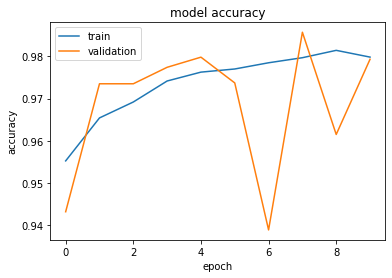

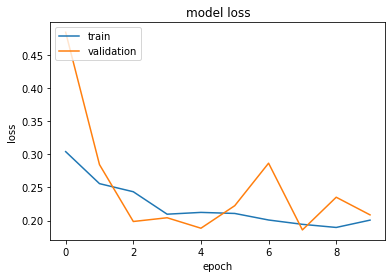

In [527]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [528]:
classifier.save('./all_neg_first_pos/2018/case5_mng')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ./all_neg_first_pos/2018/case5_mng\assets


INFO:tensorflow:Assets written to: ./all_neg_first_pos/2018/case5_mng\assets


In [ ]:
#classifier = keras.models.load_model('./all_neg_first_pos/2018')

In [ ]:
'''
# for bert
t0=time.time()
mng_ind_detected=[]
b=mng_tweets_rows[0:200000]
mng_test_embedded=embedder0(b)
y_predicted=classifier.predict(mng_test_embedded)
for ind, value in enumerate(y_predicted):
    if value >= 0.5:
        mng_ind_detected.append(ind)
print(time.time()-t0) 
'''
pass

In [ ]:
time.sleep(2*60)

In [ ]:
y_test[0:10]

In [529]:

t0=time.time()

max_tokens=50
embedding_dim=300
batch_size=1000
batch=0
#len_mng=len(mng_tweets_rows)
len_mng=len(test_texts)

results_mng=np.zeros([len_mng,1])

while batch <len_mng:
    test =  test_texts [batch : batch + batch_size]

#    test =  mng_tweets_rows [batch : batch + batch_size]
    test_data=[]
    
    for tweet in test:
    #    tokens=text.split()
        #tokens=nltk.word_tokenize(tweet)
        tokens=tknzr.tokenize(tweet)
        if tokens !="" and tokens!=' ' and  tokens!=[]:   
            a1=[]
            for token in tokens[0:max_tokens]:
                a1.append( ft.get_word_vector(token) )
            
            a1=np.asarray(a1, dtype=np.float32)            
            temp=np.zeros([max_tokens,embedding_dim])

            if len(tokens)>max_tokens:
                temp=a1[0:max_tokens]
            elif len(tokens)==max_tokens:
                temp=a1
            else: #if len(tokens)<max_tokens:
                temp[0:len(tokens)]=a1
        
            #x_test=temp.reshape((1,max_tokens,embedding_dim))  
            #print(np.shape(temp))
            #x_test = tf.cast(temp, tf.float32)
            test_data.append(temp)
            
        else:
            test_data.append(np.zeros([max_tokens,embedding_dim]))
              
#    test_data = tf.cast(test_data, tf.float32)
    test_data = np.asarray(test_data, dtype=np.float32)
    res_test=classifier.predict(test_data)
    results_mng [ batch: batch +len (res_test)]= res_test
    batch += batch_size
     
time.time()-t0

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


38.65882873535156

In [530]:
len(results_mng),len(y_test)

(20000, 20000)

In [531]:
n_correct=0
for k,i in enumerate(results_mng):
    #print(k)
    #print(i)
    if i>0.5:
        temp=1
    else:
        temp=0
    
    if temp == y_test[k]:
        n_correct +=1
        
        
accuracy=    n_correct/len(results_mng)
accuracy

0.97925

In [ ]:
with open("./years/"+year+"_tweets_mng_scores_1.txt", "rb") as fp:  
    dic_mng_tweets_scores=pickle.load(fp)


In [348]:

p_set=set(id_pos)
n_set=set(id_neg)
id_used=p_set.union(n_set)
len(id_used)

pass

In [349]:
all_ind=id_mng_rel +  id_mng_irrel

In [352]:

id_unused=[]
for i in all_ind:
    if i not in id_used:
        id_unused.append(i)
        
len(id_unused)   

pass

In [353]:
#id_unused=id_mng_rel[0:len(seed_mng_all)-num]+id_mng_irrel[0:len(seed_negative_all)-num]

In [354]:
len(id_unused)

1446042

In [89]:
rand_inds=np.sort(random.sample(range(0, len(id_unused)), 100000))
len(rand_inds)

100000

In [90]:

id_new=[]
for i in rand_inds:
    id_new.append(id_unused[i])

pass

In [91]:
'''
xxx1=set(id_mng_rel[len(seed_mng_all)-num:])
yyy1=set(id_mng_irrel[len(seed_negative_all)-num:])
for i in id_new:
    if i in xxx1 or i in yyy1:
        print('yes')
'''
pass

In [92]:

new_test=[]
for i in id_new:
    new_test.append(mng_tweets_rows[i])

pass

In [93]:
len(new_test)

100000

In [94]:
#new_test1=seed_mng_all[0:len(seed_mng_all)-num]
#len(new_test1)

In [95]:
#new_test2=seed_negative_all[0:len(seed_negative_all)-num]
#len(new_test2)

In [96]:
#new_test=new_test1+new_test2

In [97]:
#indices=id_mng_rel[0:len(seed_mng_all)-num]+id_mng_irrel[0:len(seed_negative_all)-num]

In [98]:
'''
new_test=[]
new_test_score=[]
for i, k in enumerate(seed_mng_all):
    if i not in rand_inds3:
        new_test.append(k)
        new_test_score.append(dic_mng_tweets_scores[id_mng_rel[i]])
print(len(new_test))
'''
pass

In [99]:
#new_test=seed_mng_all[0:len(seed_mng_all)-len(seed_negative)]
#len(new_test)

In [100]:

t0=time.time()

batch_size=1000
batch=0

len_mng_test_new=len(new_test)

results_mng_test_new=np.zeros([len_mng_test_new,1])

while batch <len_mng_test_new:
    test =  new_test [batch : batch + batch_size]
    test_data=[]
    
    for tweet in test:
    #    tokens=text.split()
        #tokens=nltk.word_tokenize(tweet)
        tokens=tknzr.tokenize(tweet)

        if tokens !="" and tokens!=' ' and  tokens!=[]:   
            a1=[]
            for token in tokens[0:max_tokens]:
                a1.append( ft.get_word_vector(token) )
            
            a1=np.asarray(a1, dtype=np.float32)            
            temp=np.zeros([max_tokens,embedding_dim])

            if len(tokens)>max_tokens:
                temp=a1[0:max_tokens]
            elif len(tokens)==max_tokens:
                temp=a1
            else: #if len(tokens)<max_tokens:
                temp[0:len(tokens)]=a1
        
            #x_test=temp.reshape((1,max_tokens,embedding_dim))  
            #print(np.shape(temp))
            #x_test = tf.cast(temp, tf.float32)
            test_data.append(temp)
            
        else:
            test_data.append(np.zeros([max_tokens,embedding_dim]))
              
#    test_data = tf.cast(test_data, tf.float32)
    test_data = np.asarray(test_data, dtype=np.float32)
    res_test=classifier.predict(test_data)
    results_mng_test_new [ batch: batch +len (res_test)]= res_test
    batch += batch_size
     
time.time()-t0

pass

99.18132162094116

In [101]:
with open("./years/"+year+"_tweets_mng_scores_1.txt", "rb") as fp:  
    dic_mng_tweets_scores=pickle.load(fp)

In [102]:
id_mng_rel[0],dic_mng_tweets_scores[id_mng_rel[0]]

(8428607, 0.4447795084252878)

In [103]:
id_mng_irrel[0],dic_mng_tweets_scores[id_mng_irrel[0]]

(35842959, -0.587412610046608)

In [104]:
scores=list(dic_mng_tweets_scores.items())

In [105]:
len(results_mng_test_new),len(id_new)

(100000, 100000)

In [106]:

n_correct=0
false_values=[]
correct_values=[]

for k,i in enumerate(results_mng_test_new):
    #print(k)
    #print(i)
    if i>0.5:
        temp=1
    else:
        temp=-1
    
    #print(k)
    #temp1=k+len(seed_public)
    #print(temp1)
    #print(id_mng_rel[temp1])
    #print(dic_mng_tweets_scores[id_mng_rel[temp1]])
    #print(dic_mng_tweets_scores[id_mng_rel[len(seed_public)+k]])
    if np.sign(temp) == np.sign(dic_mng_tweets_scores[id_new[k]]):
        n_correct +=1
       # correct_values.append(dic_mng_tweets_scores[id_mng_rel[len(seed_public)+k]])
        #correct_values.append(dic_mng_tweets_scores[id_mng_rel[k]])
        correct_values.append(dic_mng_tweets_scores[id_new[k]])
        
    else:
        #false_values.append(dic_mng_tweets_scores[id_mng_rel[len(seed_public)+k]])
        #false_values.append(dic_mng_tweets_scores[id_mng_rel[k]])
        false_values.append(dic_mng_tweets_scores[id_new[k]])
        
accuracy=    n_correct/len(results_mng_test_new)
accuracy

pass

0.88258

In [107]:
'''
positive_values=[]
for i in id_mng_rel:
    positive_values.append(dic_mng_tweets_scores[i])
'''
pass

In [241]:
'''
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 10))
plt.title('false distribution')
plt.xlabel('score')
plt.ylabel('number of samples')
#n_max=dic_mng_tweets_scores[id_mng_rel[len(seed_public)]]
#x = np.random.randn(1000)
plt.hist(false_values, bins=40)
fig.savefig('./all_neg_first_pos/'+year+'/false_distribution2.jpg')
'''
pass

In [240]:
'''
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 10))
plt.title('correct distribution')
plt.xlabel(' score')
plt.ylabel('number of samples')
#n_max=dic_mng_tweets_scores[id_mng_rel[len(seed_public)]]
#x = np.random.randn(1000)
plt.hist(correct_values, bins=40)
fig.savefig('./all_neg_first_pos/'+year+'/correct_distribution2.jpg')
'''
pass

In [110]:
'''
for i in correct_values:
    if i<dic_mng_tweets_scores[id_mng_rel[-num]] and i > dic_mng_tweets_scores[id_mng_irrel[-num]]:
        print('yes')
'''
pass

In [111]:
'''
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 10))
plt.title('all positive distribution')
plt.xlabel('positive score')
plt.ylabel('number of samples')
#n_max=dic_mng_tweets_scores[id_mng_rel[len(seed_public)]]
#x = np.random.randn(1000)
plt.hist(positive_values, bins=40)
fig.savefig('./all_neg_first_pos/2017/all_distribution3.jpg')
'''
pass

In [112]:
#len(false_values), len(correct_values), len(false_values)+len(correct_values)

(11742, 88258, 100000)

In [113]:
#time.sleep(10*60)

In [114]:
#with open("mng_results300.txt", "wb") as fp:   
#    pickle.dump(results_mng, fp , protocol=4)

In [115]:
#results_mng_numpy=np.asarray(results_mng, dtype=np.float32)

In [116]:
#len(results_mng)

In [117]:
#with open("mng_results300_np.txt", "wb") as fp:   
#    pickle.dump(results_mng_numpy, fp , protocol=4)